#EDA - Assignment Questions
##EDA-01 - Bike Details Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/BIKE DETAILS.csv')

In [3]:
df

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [4]:
df.shape

(1061, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [9]:
#1. What is the range of selling prices in the dataset?
print("Lowest Being: ",df['selling_price'].min())
print("Highest Being: ",df['selling_price'].max())
range=df['selling_price'].max()-df['selling_price'].min()
print(f"The range of selling prices in the dataset is {range}")

Lowest Being:  5000
Highest Being:  760000
The range of selling prices in the dataset is 755000


In [10]:
#2. What is the median selling price for bikes in the dataset?
print("Median Selling Price: ",df['selling_price'].median())

Median Selling Price:  45000.0


In [15]:
#3. What is the most common seller type?
diff_seller=df['seller_type'].value_counts()
print("The most common seller type :",df['seller_type'].mode()[0])
diff_seller

The most common seller type : Individual


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [20]:
#4. How many bikes have driven more than 50,000 kilometers?
num=len(df[df['km_driven'] > 50000])
print('Number of bikes which have driven more than 50000 kilometers are: ',num)

Number of bikes which have driven more than 50000 kilometers are:  170


In [23]:
#5. What is the average km_driven value for each ownership type?
print("The average km_driven value for each ownership type is: ")
round(df.groupby('owner')['km_driven'].mean(),2)

The average km_driven value for each ownership type is: 


owner
1st owner     32816.58
2nd owner     39288.99
3rd owner     33292.18
4th owner    311500.00
Name: km_driven, dtype: float64

In [31]:
#6 What proportion of bikes are from the year 2015 or older?
print('Proportion contributing older than 2015 is ',df[df['year'] <= 2015].shape[0] / df.shape[0])


Proportion contributing older than 2015 is  0.5664467483506126


In [33]:
#7. What is the trend of missing values across the dataset?
print("Trend of missing values across the dataset: ")
df.isna().sum()

Trend of missing values across the dataset: 


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [38]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
df[df['ex_showroom_price']==df['ex_showroom_price'].max()][['ex_showroom_price','name']]

ex_showroom_price                        name
134          1278000.0  Harley-Davidson Street Bob

In [39]:
#9. What is the total number of bikes listed by each seller type?
df.groupby('seller_type')['name'].count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

In [47]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
df[['selling_price','km_driven']].corr()

selling_price  km_driven
selling_price       1.000000  -0.212937
km_driven          -0.212937   1.000000

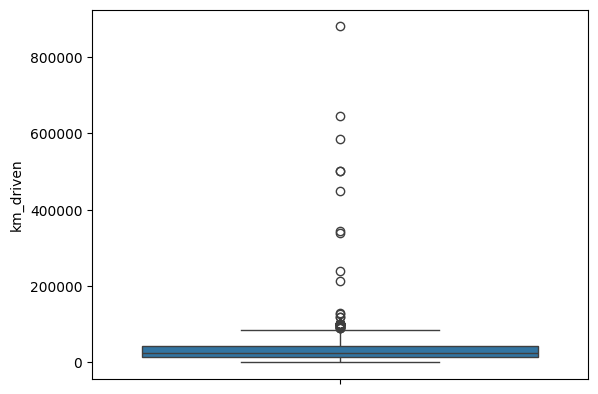

[  91   93  115  135  154  184  363  470  474  477  511  535  548  575
  592  598  610  630  642  668  687  695  712  714  716  726  773  782
  797  830  872  877  901  903  908  930 1039 1056 1060]


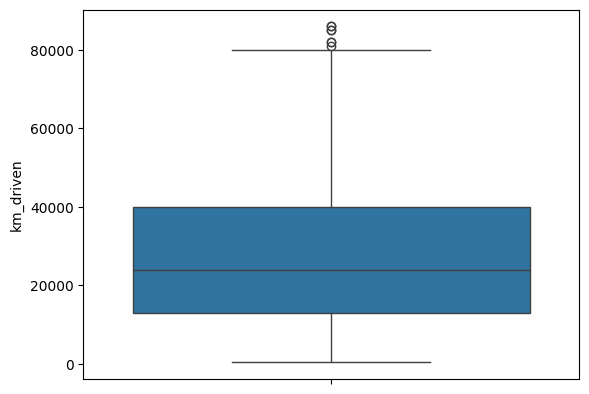

In [50]:
#11. Identify and remove outliers in the km_driven column using the IQR methodB
sns.boxplot(df['km_driven'])
plt.show()
outlier_indecies=[]
for i in df['km_driven']:

  LB=df['km_driven'].quantile(0.25)
  UB=df['km_driven'].quantile(0.75)
  IQR=UB-LB
  LF=LB-(1.5*IQR)
  UF=UB+(1.5*IQR)
  mask= (df['km_driven'] >= LF) & (df['km_driven'] <= UF)
  mask=mask.to_numpy()
  false_indices=np.argwhere(~mask) #Opposite to the Masks
  outlier_indecies.append(false_indices)

print(np.unique(np.concatenate(outlier_indecies).ravel()))
df.drop(np.unique(np.concatenate(outlier_indecies).ravel()),inplace=True)
sns.boxplot(df['km_driven'])
plt.show()

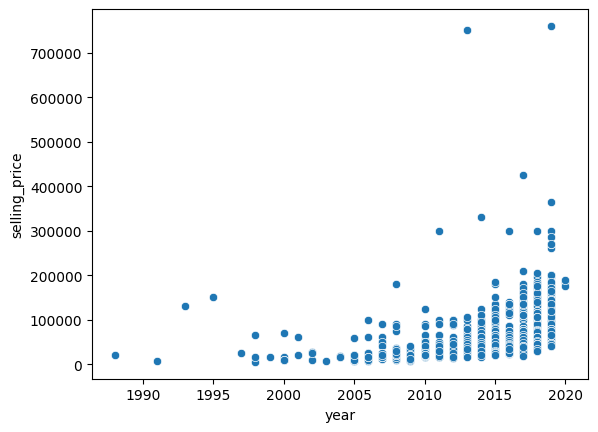

In [54]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price?
sns.scatterplot(x='year',y='selling_price',data=df)
plt.show()

In [59]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
df.dropna(inplace=True,axis=0)
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
average_depreciation = df['depreciation'].mean()
current_year = 2025  # Change this based on the actual current year
df['bike_age'] = current_year - df['year']
df.groupby('bike_age')['depreciation'].mean()


bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22307.226190
9     28750.407407
10    28314.291139
11    34287.812500
12    42766.423077
13    36609.529412
14    47758.750000
15    46757.280000
16    41398.909091
17    53021.166667
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: depreciation, dtype: float64

In [70]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_selling_price'] = df['year'].map(average_price_by_year)
df_high_priced = df[df['selling_price'] > df['avg_selling_price']]
high_priced_bike_names = df_high_priced['name'].unique()
print(high_priced_bike_names)

['Royal Enfield Classic Gunmetal Grey' 'Yamaha Fazer FI V 2.0 [2016-2018]'
 'Yamaha YZF R3' 'Yamaha YZF R15 S' 'Yamaha FZ25' 'Honda CBR-250R'
 'Yamaha FZ16' 'Honda CB Hornet 160R' 'Mahindra Mojo XT300'
 'Bajaj Pulsar AS200' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'UM Renegade Commando'
 'Honda Activa 3G' 'Harley-Davidson Street Bob'
 'KTM 390 Duke ABS [2013-2016]' 'Royal Enfield Classic 500'
 'Suzuki Gixxer [2014-2018]' 'Bajaj Pulsar 180' 'Honda CB Unicorn 150'
 'Yamaha YZF R15 [2011-2018]' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Yamaha FZ S V 2.0' 'Hero Xtreme Sports'
 'Yamaha FZ V 2.0' 'Bajaj Avenger Street 220'
 'Kawasaki Ninja 650 [2018-2019]' 'Kawasaki Ninja 250R' 'Suzuki GSX S750'
 'Harley-Davidson Street 750' 'BMW G310GS' 'Royal Enfield Thunderbird 500'
 'Bajaj Avenger Street 150 [2018]' 'Hero Achiever 150'
 'Royal Enfield Classic Stealth Black' 'Yamaha Fazer [2009-2016]'
 'Suzuki Intruder 150 Fi' 'Royal Enfield Classic Squadron Blu

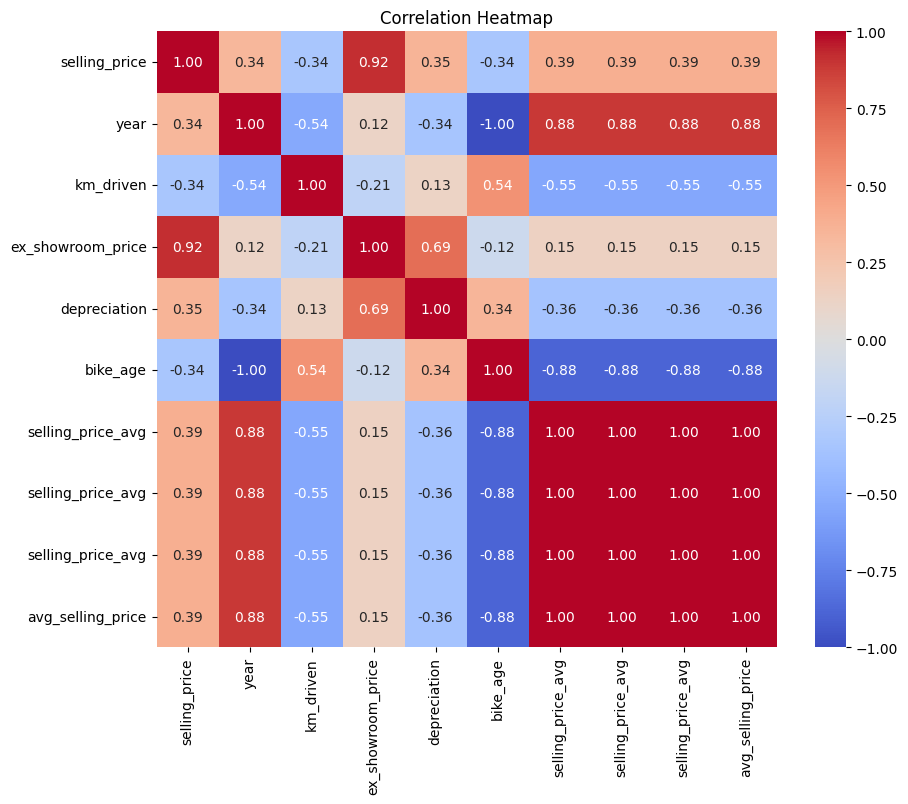

In [75]:
 #15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## EDA-02 - Car Sale Dataset


In [76]:
df1=pd.read_csv('/content/Car Sale.csv')

In [77]:
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

In [78]:
df1.shape

(23906, 16)

In [79]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [81]:
df1.dropna(axis=0,inplace=True)

In [82]:
df1.shape

(23905, 16)

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


In [84]:
df1.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [87]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
print('Average selling price of cars for each dealer.')
df1.groupby('Dealer_Name')['Price ($)'].mean()

Average selling price of cars for each dealer.


Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Mercury                    27867.131955
Pars Auto Sales                                    28013.060317
Pitre Buick-Pontiac-Gmc of Scottsdale              27404.248408
Progressive Shippers Cooperative Association No    27884.264036
Rabun Used Car Sales                               28527.536177
Race Car Help                                      28163.372706
Ryder Truck Rental and Leasing                     27914.988782
Saab-Belle Dodge                                   28176.692000
Scrivener Performance Engineering                  28297.371589
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
Tri-State Mack Inc                                 28095.562050
U-Haul CO                                          28769.919006
Name: Price ($), dtype: float64

In [92]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
print('Car brand "Lincoln" has the highest variation in prices.')
df1.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

Car brand "Lincoln" has the highest variation in prices.


Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11181.678786
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

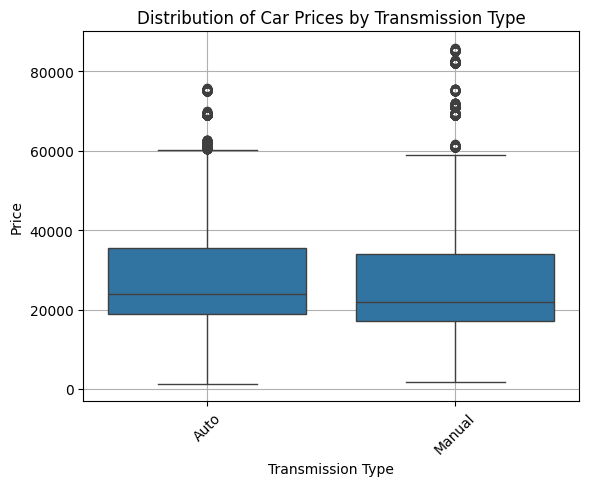

                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [98]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
sns.boxplot(x='Transmission', y='Price ($)', data=df1)

plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)


plt.show()


iqr_values = df1.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr_values['IQR'] = iqr_values[0.75] - iqr_values[0.25]
print(iqr_values[['IQR']])

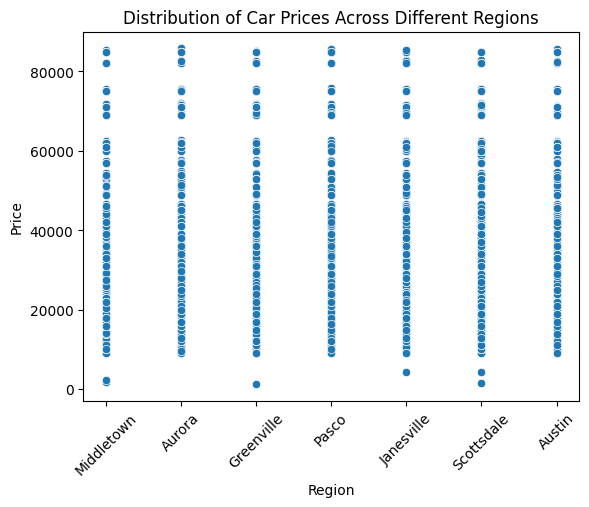

In [102]:
#4.  What is the distribution of car prices across different regions
sns.scatterplot(x='Dealer_Region', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

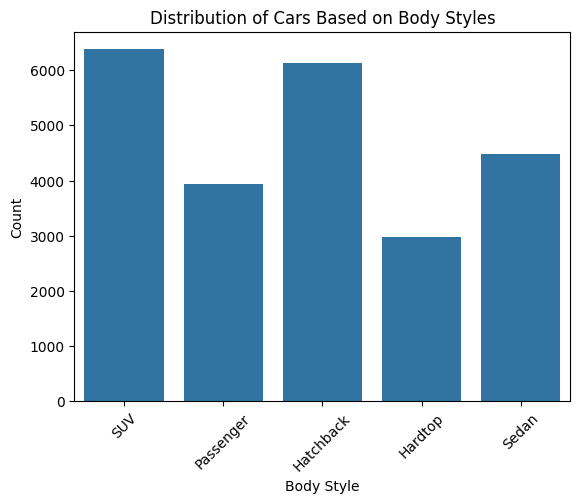

In [105]:
#5. What is the distribution of cars based on body styles
sns.countplot(x='Body Style', data=df1)
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [106]:
#6. How does the average selling price of cars vary by customer gender and annual income
df1.groupby(['Gender','Annual Income'])['Price ($)'].mean()

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

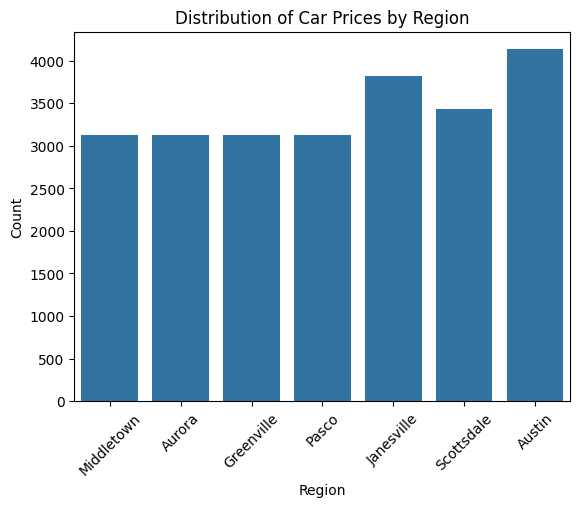

In [107]:
#7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region?
sns.countplot(x='Dealer_Region', data=df1)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [109]:
#8. How does the average car price differ between cars with different engine sizes
df1.groupby('Engine')['Price ($)'].mean()

Engine
DoubleÂ Overhead Camshaft    28247.193317
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

In [110]:
#9. How do car prices vary based on the customer’s annual income bracket
df1.groupby('Annual Income')['Price ($)'].mean()

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64

In [116]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df1['Model'].value_counts().head(5).index
filtered_df = df1[df1['Model'].isin(top_5_models)]
filtered_df.groupby('Model')['Price ($)'].std()

Model
Diamante       9770.768958
Jetta         16346.793440
Passat         8218.521683
Prizm          8012.531045
Silhouette    17940.571762
Name: Price ($), dtype: float64

In [118]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?
df1.groupby(['Engine','Color'])['Price ($)'].std().sort_values(ascending=False)

Engine                     Color     
Overhead Camshaft          Black         17457.405345
                           Red           17346.642554
DoubleÂ Overhead Camshaft  Pale White    14402.370508
                           Red           13499.354247
Overhead Camshaft          Pale White    13000.103061
DoubleÂ Overhead Camshaft  Black         12418.674126
Name: Price ($), dtype: float64

In [120]:
#12.  Is there any seasonal trend in car sales based on the date of sale?
df1['Date of Sale'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date of Sale'].dt.month
df1.groupby('Month')['Price ($)'].mean()

Month
1     27463.567089
2     28087.000000
3     27169.949837
4     28316.878550
5     28085.088654
6     28283.324781
7     27929.293913
8     28617.969501
9     28331.370045
10    28434.571038
11    27943.118478
12    27993.812465
Name: Price ($), dtype: float64

In [121]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type
df1.groupby(['Body Style','Transmission'])['Price ($)'].mean()

Body Style  Transmission
Hardtop     Auto            31510.607676
            Manual          27016.943698
Hatchback   Auto            25910.544824
            Manual          28702.550562
Passenger   Auto            28915.835149
            Manual          28969.521039
SUV         Auto            27501.404407
            Manual          26079.019161
Sedan       Auto            29955.294344
            Manual          29664.271572
Name: Price ($), dtype: float64

In [104]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [124]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
df1[['Price ($)', 'Annual Income']].corr()

Price ($)  Annual Income
Price ($)       1.000000       0.012075
Annual Income   0.012075       1.000000

In [128]:
#15.  How does the average car price vary across different car models and engine types
pd.set_option('display.max_rows', None)
df1.groupby(['Model','Engine'])['Price ($)'].mean()

Model           Engine                   
3-Sep           DoubleÂ Overhead Camshaft    37986.380117
3000GT          DoubleÂ Overhead Camshaft    22764.326923
                Overhead Camshaft            21770.659864
300M            DoubleÂ Overhead Camshaft    21394.888889
323i            DoubleÂ Overhead Camshaft    16744.632287
                Overhead Camshaft            21038.162162
328i            DoubleÂ Overhead Camshaft    21069.149606
                Overhead Camshaft            38676.177215
4Runner         DoubleÂ Overhead Camshaft    32167.794118
                Overhead Camshaft            25075.416667
5-Sep           DoubleÂ Overhead Camshaft    41067.000000
                Overhead Camshaft            28071.454545
528i            DoubleÂ Overhead Camshaft    46288.712963
                Overhead Camshaft            21197.898148
A4              DoubleÂ Overhead Camshaft    27070.500000
                Overhead Camshaft            12046.220000
A6              DoubleÂ Overhead Camshaft    25458.258929
                Overhead Camshaft            21220.262673
A8              Overhead Camshaft            33203.756757
Accent          Overhead Camshaft            18129.085714
Accord          DoubleÂ Overhead Camshaft    20008.104000
                Overhead Camshaft            34718.720339
Alero           Overhead Camshaft            17072.333333
Altima          DoubleÂ Overhead Camshaft    20370.258824
Aurora          DoubleÂ Overhead Camshaft    24080.571429
                Overhead Camshaft            51833.556962
Avalon          DoubleÂ Overhead Camshaft    18000.133333
Avenger         DoubleÂ Overhead Camshaft    25778.539823
Beetle          DoubleÂ Overhead Camshaft    45080.371795
                Overhead Camshaft            21085.976190
Bonneville      DoubleÂ Overhead Camshaft    19368.500000
                Overhead Camshaft            23772.671642
Boxter          DoubleÂ Overhead Camshaft    26000.173913
                Overhead Camshaft            20279.818182
Bravada         DoubleÂ Overhead Camshaft    20356.058824
                Overhead Camshaft            26592.407767
Breeze          DoubleÂ Overhead Camshaft    29292.241379
                Overhead Camshaft            16116.866667
C-Class         DoubleÂ Overhead Camshaft    14435.169811
                Overhead Camshaft            14593.686869
C70             DoubleÂ Overhead Camshaft    26983.134328
                Overhead Camshaft            32874.055944
CL500           Overhead Camshaft            24917.950355
CLK Coupe       DoubleÂ Overhead Camshaft    22029.517241
CR-V            DoubleÂ Overhead Camshaft    23152.954839
Cabrio          DoubleÂ Overhead Camshaft    16496.154472
                Overhead Camshaft            25025.357143
Camaro          DoubleÂ Overhead Camshaft    29184.372727
Camry           DoubleÂ Overhead Camshaft    31065.820896
                Overhead Camshaft            31531.719101
Caravan         DoubleÂ Overhead Camshaft    25101.508475
                Overhead Camshaft            24068.363636
Carrera Cabrio  DoubleÂ Overhead Camshaft    27535.670886
                Overhead Camshaft            22123.764706
Carrera Coupe   DoubleÂ Overhead Camshaft    21362.000000
                Overhead Camshaft            20567.525641
Catera          DoubleÂ Overhead Camshaft    56836.933333
Cavalier        Overhead Camshaft            20221.923529
Celica          DoubleÂ Overhead Camshaft    35733.614583
                Overhead Camshaft            14073.426829
Century         DoubleÂ Overhead Camshaft    17051.431818
Cherokee        DoubleÂ Overhead Camshaft    25089.459459
Cirrus          DoubleÂ Overhead Camshaft    12074.514286
                Overhead Camshaft            24150.000000
Civic           DoubleÂ Overhead Camshaft    25047.641026
                Overhead Camshaft            43694.857143
Concorde        DoubleÂ Overhead Camshaft    32911.602273
                Overhead Camshaft            22298.622951
Continental   

# EDA-03 - Amazon Sales Data


In [20]:
df2=pd.read_csv('/content/amazon.csv')

In [130]:
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
5     B08Y1TFSP6  pTron Solero TB301 3A Type-C Data and Fast Cha...   
6     B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
7     B08DDRGWTJ             MI Usb Type-C Cable Smartphone (Black)   
8     B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   
9     B082LZGK39  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
10    B08CF3D7QR  Portronics Konnect L POR-1081 Fast Charging 3A...   
11    B0789LZTCJ  boAt Rugged v3 Extra Tough Unbreakable Braided...   
12    B07KSMBL2H  AmazonBasics Flexible Premium HDMI Cable (Blac...   
13    B085DTN6R2  Portronics Konnect CL 20W POR-1067 Type-C to 8...   
14    B09KLVMZ3B  Portronics Konnect L 1.2M POR-1401 Fast Chargi...   
15    B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
16    B0B6F7LX4C  MI 80 cm (32 inches) 5A Series HD Ready Smart ...   
17    B082LSVT4B  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
18    B08WRBG3XW  boAt Type C A325 Tangle-free, Sturdy Type C Ca...   
19    B08DPLCM6T  LG 80 cm (32 inches) HD Ready Smart LED TV 32L...   
20    B09C6HXFC1  Duracell USB Lightning Apple Certified (Mfi) B...   
21    B085194JFL  tizum HDMI to VGA Adapter Cable 1080P for Proj...   
22    B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
23    B09NHVCHS9        Flix Micro Usb Cable For Smartphone (Black)   
24    B0B1YVCJ2Y  Acer 80 cm (32 inches) I Series HD Ready Andro...   
25    B01M4GGIVU  Tizum High Speed HDMI Cable with Ethernet | Su...   
26    B08B42LWKN  OnePlus 80 cm (32 inches) Y Series HD Ready LE...   
27    B094JNXNPV  Ambrane Unbreakable 3 in 1 Fast Charging Braid...   
28    B09W5XR9RT  Duracell USB C To Lightning Apple Certified (M...   
29    B077Z65HSD  boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...   
30    B00NH11PEY  AmazonBasics USB 2.0 - A-Male to A-Female Exte...   
31    B09CMM3VGK  Ambrane 60W / 3A Type C Fast Charging Unbreaka...   
32    B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
33    B008FWZGSG  Samsung Original Type C to C Cable - 3.28 Feet...   
34    B0B4HJNPV4  pTron Solero T351 3.5Amps Fast Charging Type-C...   
35    B08Y1SJVV5  pTron Solero MB301 3A Micro USB Data & Chargin...   
36    B07XLCFSSN  Amazonbasics Nylon Braided Usb-C To Lightning ...   
37    B09RZS1NQT  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...   
38    B0B3MMYHYW  OnePlus 126 cm (50 inches) Y Series 4K Ultra H...   
39    B09C6HWG18  Duracell Type C To Type C 5A (100W) Braided Sy...   
40    B00NH11KIK  AmazonBasics USB 2.0 Cable - A-Male to B-Male ...   
41    B09JPC82QC  Mi 108 cm (43 inches) Full HD Android LED TV 4...   
42    B07JW1Y6XV  Wayona Nylon Braided 3A Lightning to USB A Syn...   
43    B07KRCW6LZ  TP-Link Nano AC600 USB Wi-Fi Adapter(Archer T2...   
44    B09NJN8L25  FLiX (Beetel USB to Micro USB PVC Data Sync & ...   
45    B07XJYYH7L  Wecool Nylon Braided Multifunction Fast Chargi...   
46    B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
47    B014I8SSD0  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
48    B09L8DSSFH  7SEVEN® Compatible for Samsung Smart 4K Ultra ...   
49    B07232M876  Amazonbasics Micro Usb Fast Charging Cable For...   
50    B07P681N66  TP-Link AC600 600 Mbps WiFi Wireless Network U...   
51    B0711PVX6Z  AmazonBasics Micro USB Fast Charging Cable for...   
52    B082T6V3DT  AmazonBasics New Release Nylon USB-A to Lightn...   
53    B07MKFNHKG  VW 80 cm (32 inches) Frameless Series HD Ready...   
54    B0BFWGBX61  Ambrane Unbreakable 3A Fast Charging Braided T...   
55    B01N90RZ4M              

In [132]:
df2.shape

(1465, 16)

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [134]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [146]:
#1. What is the average rating for each product category?
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce').fillna(0)
df2.groupby('category')['rating'].mean()



category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                     3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                    4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                         3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            4.050000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams                         4.200000
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                                 4.033333
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables                                          4.400000
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables                                     4.400000
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables                                         3.900000
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          4.151931
Computers&Accessories|Accessories&Peripherals|HardDiskBags                                                                 4.333333
Computers&Accessories|Accessories&Peripherals|HardDriveAccessories|Caddies                                                 4.100000
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|GraphicTablets                                   3.981818
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers              3.400000
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads               4.375000
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MouseSets                               4.050000
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboards                                        4.120000
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                                             4.287500
Computers&Accessories|Accessories&Peripherals|LaptopAccessories                                                            4.300000
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Bags&Sleeves|LaptopSleeves&Slipcases                       4.250000
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|CameraPrivacyCovers                                        4.300000
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|CoolingPads                                                4.100000
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Lapdesks                                                   4.064286
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|LaptopChargers&PowerSupplies                               3.980000
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|NotebookComputerStands                                     4.300000
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Gamepads                                                 4.266667
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingKeyboards                                          4.366667
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingMice                                               4.383333
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Headsets                                                 4.033333
Computers&Accessories|Accessori

In [150]:
#2. What are the top rating_count products by category ?
df2.groupby('category')['rating'].max().sort_values(ascending=False)[:2]

category
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice       5.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    5.0
Name: rating, dtype: float64

In [8]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

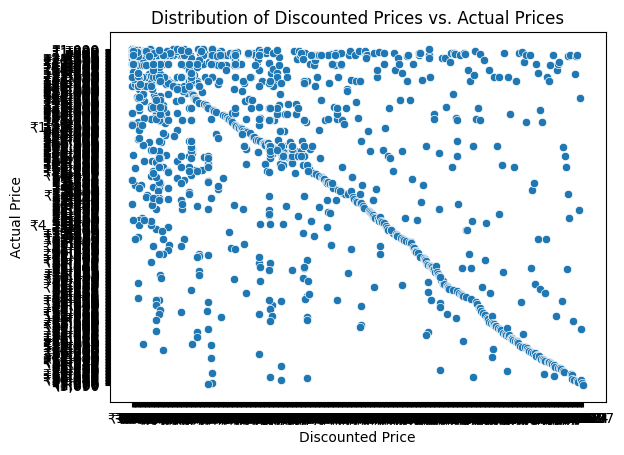

In [9]:
#3.  What is the distribution of discounted prices vs. actual prices
sns.scatterplot(x='discounted_price', y='actual_price', data=df2)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()

In [21]:
#4.  How does the average discount percentage vary across categories

df2['discounted_price']=pd.to_numeric(df2['discounted_price'], errors='coerce')

df2.groupby('category')['discounted_price'].mean()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens    NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens   NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens         NaN
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                    NaN
Name: discounted_price, Length: 211, dtype: float64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [22]:
#5. What are the most popular product names
df2['product_name'].value_counts()[:5]

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Name: count, dtype: int64

In [24]:
#6. What are the most popular product keywords

df2['product_keywords'].value_counts()[:5]

In [27]:
#7. What are the most popular product reviews?
df2['review_title'].value_counts()[:5]

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                        10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                        8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good     8
Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet                                                                                                                        7
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit                                                                               7
Name: count, dtype: int64

In [31]:
#8. What is the correlation between discounted_price and rating
df2['discounted_price'] = pd.to_numeric(df2['discounted_price'], errors='coerce')
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')


df2[['discounted_price', 'rating']].corr()


discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0

In [32]:
#9.  What are the Top 5 categories based on the highest rating
df2.groupby('category')['rating'].mean().sort_values(ascending=False)[:5]

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

10.  Identify any potential areas for improvement or optimization based on the data analysis
  - Can improve on the discounted price
  - Make the adjustments based on the product reviews.

## EDA-04 : Spotify Data: Popular Hip-hop Artists and Tracks

In [12]:

df3=pd.read_csv('/content/spotify.csv')

In [3]:
df3

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [4]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [13]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
nul=df3.isnull().sum()
num=df3.duplicated().sum()
df3.drop_duplicates(inplace=True)
print("Duplicate Values been droped : ",num)
nul

Duplicate Values been droped :  27


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

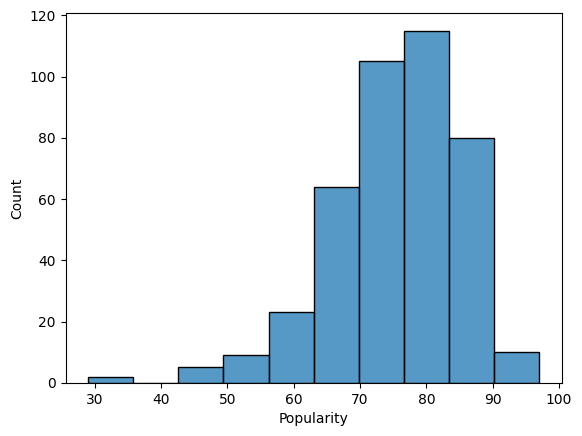

In [17]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram .
sns.histplot(df3['Popularity'],bins=10)
plt.show()


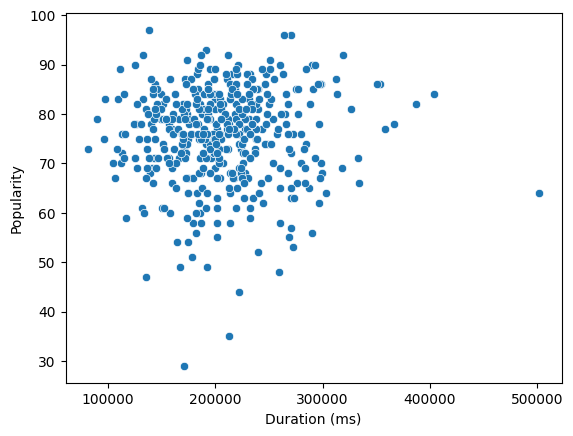

Tracks between 100000 (ms) and 300000 (ms) are more popular.


In [24]:
#3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
sns.scatterplot(x='Duration (ms)',y='Popularity',data=df3)
plt.show()
print("Tracks between 100000 (ms) and 300000 (ms) are more popular.")

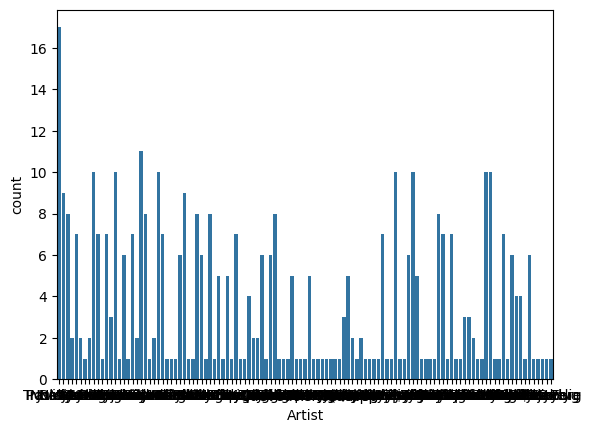

Artist
Drake    17
Name: Track Name, dtype: int64

In [27]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
sns.countplot(x='Artist',data=df3)
plt.show()
df3.groupby('Artist')['Track Name'].count().sort_values(ascending=False)[:1]

In [29]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
df3.sort_values('Popularity')[:5][['Artist','Track Name']]

Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)

In [30]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)[:5]

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

In [32]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_5_artist=df3.groupby('Artist')['Popularity'].max().sort_values(ascending=False)[:5]
top_tracks = df3[df3.apply(lambda row: row['Popularity'] == top_5_artist.get(row['Artist']), axis=1)]
top_tracks[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=False)

Artist                  Track Name  Popularity
40    Jack Harlow                 Lovin On Me          97
70      21 Savage                      redrum          96
260            ¥$                    CARNIVAL          96
30   Travis Scott  FE!N (feat. Playboi Carti)          93
140         cassö                       Prada          92

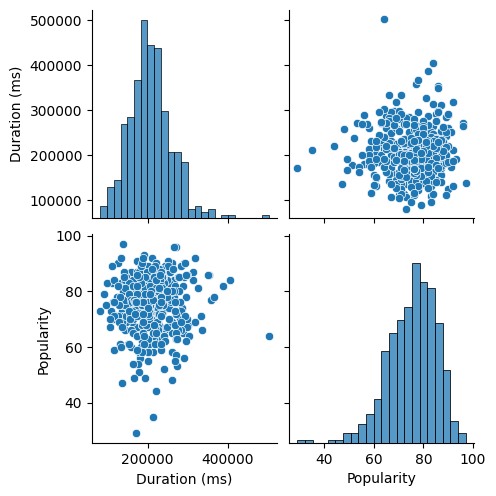

In [35]:
#8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df3[['Duration (ms)','Popularity']])
plt.show()

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


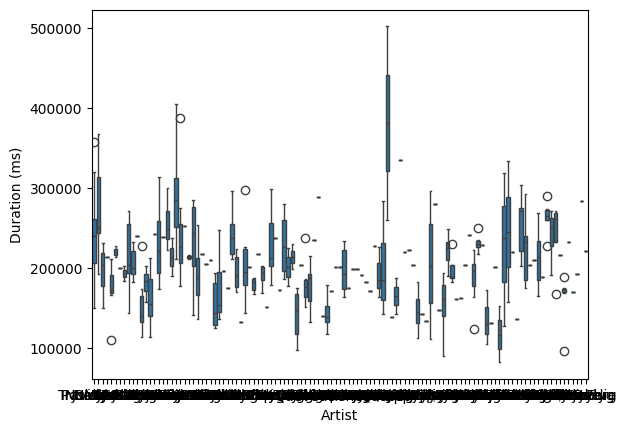

Yes duration of tracks varies across different artists.


In [37]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
sns.boxplot(x='Artist',y='Duration (ms)',data=df3)
plt.show()
print("Yes duration of tracks varies across different artists.")

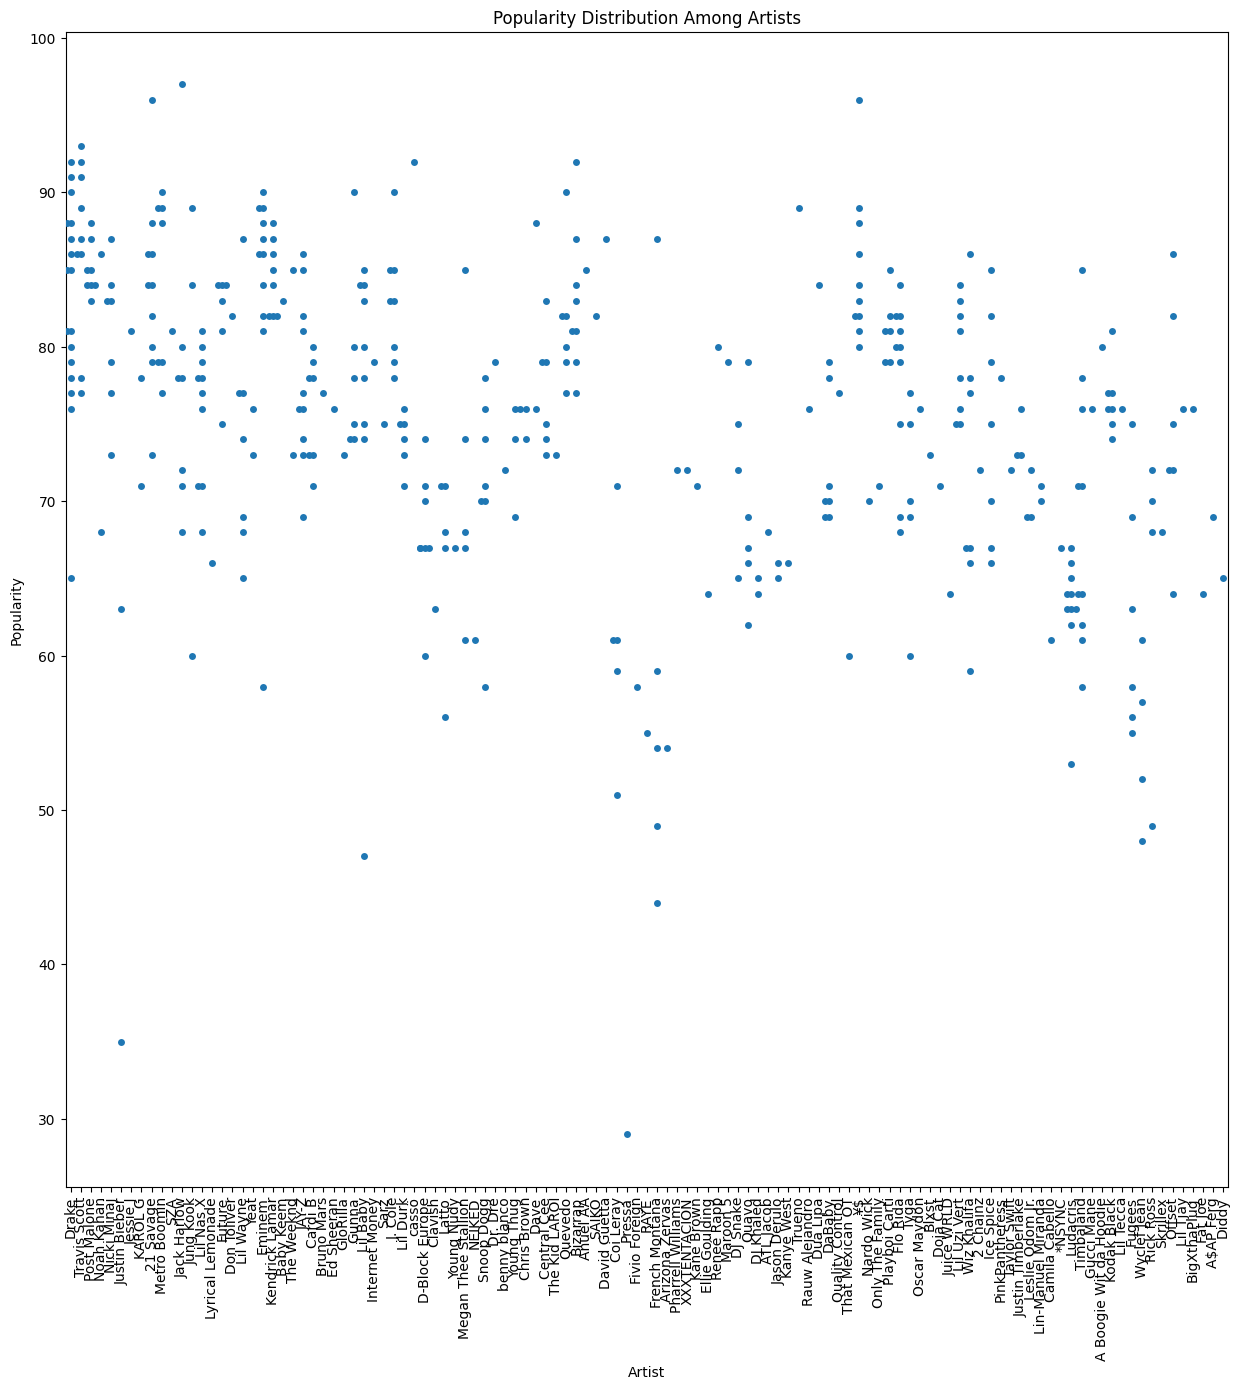

In [42]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(15, 15))
sns.swarmplot(x='Artist', y='Popularity', data=df3)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Popularity Distribution Among Artists')
plt.show()